In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

# Exploration

In [32]:
clustered_train_data = pd.read_csv(
    './clustered_train_data.csv',
    low_memory=False
)
submit = pd.read_csv(
    './submission_data.csv',
    low_memory=False
)
clustered_train_data

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,...,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target,drug_in_other_countries,therapeutic_area_encoded,cluster_nl_encoded,cluster
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,-1,...,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784,True,10,499,7
1,BRAND_626D,-1.000000,-1.000000,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01 00:00:00,...,0.000047,-1.000000,1.626677,-1.000000,THER_AREA_96D7,1.000000,True,9,1039,5
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,-1,...,0.001502,-1.000000,3.144874,1.835821,THER_AREA_96D7,1.002258,True,9,693,7
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,-1,...,0.001304,-1.000000,1.213446,1.805970,THER_AREA_6CEE,1.068761,True,7,2254,2
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,-1,...,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312,True,7,711,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116653,BRAND_2058,2.074438,2.058055,BRAND_2058_COUNTRY_C8F4,CORP_3C9A,COUNTRY_C8F4,2020-11-01,2022-12-01,DRUG_ID_74A6,-1,...,0.095233,1.054007,1.100336,2.029851,THER_AREA_6CEE,1.203657,True,7,295,4
116654,BRAND_4888,1.756234,1.819485,BRAND_4888_COUNTRY_6F78,CORP_A713,COUNTRY_6F78,2019-07-01,2022-12-01,DRUG_ID_52A5,-1,...,0.033939,1.008317,1.029630,1.955224,THER_AREA_980E,1.109272,True,10,719,2
116655,BRAND_0056,1.127497,1.491552,BRAND_0056_COUNTRY_0C7D,CORP_01C7,COUNTRY_0C7D,2018-09-01,2022-12-01,DRUG_ID_D637,-1,...,0.012526,1.017259,1.018310,1.926795,THER_AREA_644A,1.343341,True,4,3,3
116656,BRAND_6200,1.874532,2.020277,BRAND_6200_COUNTRY_89F9,CORP_39F7,COUNTRY_89F9,2020-09-01,2022-12-01,DRUG_ID_B0E9,2020-11-01 00:00:00,...,0.001334,1.960978,2.490911,1.985847,THER_AREA_96D7,1.266831,True,9,1013,0


In [33]:
submit['cluster_nl'].value_counts()

cluster_nl
BRAND_E57A_COUNTRY_06E4    12
BRAND_D72F_COUNTRY_3536    12
BRAND_6200_COUNTRY_9488    12
BRAND_267B_COUNTRY_9488    12
BRAND_740F_COUNTRY_3AD0    12
                           ..
BRAND_056A_COUNTRY_9488     2
BRAND_9259_COUNTRY_9488     2
BRAND_81A0_COUNTRY_9891     1
BRAND_B8DE_COUNTRY_C8F4     1
BRAND_417D_COUNTRY_B6AE     1
Name: count, Length: 182, dtype: int64

In [34]:
clustered_train_data['cluster_nl'].value_counts()

cluster_nl
BRAND_354E_COUNTRY_88A3    60
BRAND_A12A_COUNTRY_88A3    60
BRAND_B01A_COUNTRY_9488    60
BRAND_71FA_COUNTRY_4242    60
BRAND_45D9_COUNTRY_E319    60
                           ..
BRAND_2CB8_COUNTRY_D5B9     1
BRAND_7202_COUNTRY_B6AE     1
BRAND_F2F2_COUNTRY_B6AE     1
BRAND_2205_COUNTRY_5FEB     1
BRAND_3938_COUNTRY_907E     1
Name: count, Length: 2669, dtype: int64

In [35]:
# Group by 'cluster_nl' and collect the unique 'cluster' values
cluster_info = (
    clustered_train_data.groupby('cluster_nl')['cluster']
    .unique()
    .reset_index()
    .rename(columns={'cluster': 'clusters_involved'})
)

# Filter for 'cluster_nl' values that appear in more than one cluster
duplicated_clusters = cluster_info[cluster_info['clusters_involved'].apply(len) > 1]

# Sort by the number of clusters (in descending order)
duplicated_clusters['cluster_count'] = duplicated_clusters['clusters_involved'].apply(len)
duplicated_clusters = duplicated_clusters.sort_values(by='cluster_count', ascending=False)

# Display the results
duplicated_clusters

/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_21956/636994131.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_clusters['cluster_count'] = duplicated_clusters['clusters_involved'].apply(len)


,cluster_nl,clusters_involved,cluster_count
515,BRAND_358A_COUNTRY_EA71,"[3, 2, 4]",3
368,BRAND_284A_COUNTRY_5FEB,"[7, 0, 2]",3
2327,BRAND_DBFB_COUNTRY_89F9,"[4, 2, 0]",3
382,BRAND_29F9_COUNTRY_89F9,"[4, 2, 0]",3
884,BRAND_532C_COUNTRY_53A5,"[4, 2, 0]",3
...,...,...,...
849,BRAND_4F19_COUNTRY_D8B0,"[2, 0]",2
845,BRAND_4F19_COUNTRY_9891,"[2, 0]",2
844,BRAND_4F19_COUNTRY_89F9,"[2, 0]",2
842,BRAND_4F19_COUNTRY_53A5,"[2, 0]",2


In [36]:
# Group by 'cluster_nl' and collect the unique 'cluster' values
cluster_info = (
    clustered_train_data.groupby('drug_id')['cluster']
    .unique()
    .reset_index()
    .rename(columns={'cluster': 'clusters_involved'})
)

# Filter for 'cluster_nl' values that appear in more than one cluster
duplicated_clusters = cluster_info[cluster_info['clusters_involved'].apply(len) > 1]

# Display the results
duplicated_clusters

,drug_id,clusters_involved
0,DRUG_ID_0259,"[2, 7, 3, 0, 1]"
2,DRUG_ID_032B,"[2, 0, 7]"
3,DRUG_ID_0383,"[7, 2]"
5,DRUG_ID_0476,"[7, 2]"
6,DRUG_ID_04FA,"[4, 3, 1]"
...,...,...
248,DRUG_ID_F923,"[4, 3]"
249,DRUG_ID_F978,"[2, 7, 0]"
250,DRUG_ID_FADD,"[0, 2, 7, 1]"
252,DRUG_ID_FD54,"[6, 3]"


# Origins

In [37]:
df = pd.read_csv(
    './train_data.csv',
    low_memory=False
)
dff = df

label_encoder = LabelEncoder()

dff['brand'] =  label_encoder.fit_transform(dff['brand'])
dff['cluster_nl'] =  label_encoder.fit_transform(dff['cluster_nl'])
dff['corporation'] =  label_encoder.fit_transform(dff['corporation'])
dff['country'] =  label_encoder.fit_transform(dff['country'])
dff['launch_date'] =  label_encoder.fit_transform(dff['launch_date'])
dff['date'] =  label_encoder.fit_transform(dff['date'])
dff['ind_launch_date'] =  label_encoder.fit_transform(dff['ind_launch_date'])
dff['indication'] =  label_encoder.fit_transform(dff['indication'])
dff['drug_id'] =  label_encoder.fit_transform(dff['drug_id'])
dff['therapeutic_area'] =  label_encoder.fit_transform(dff['therapeutic_area'])


columns = ['che_pc_usd', 'che_perc_gdp', 'insurance_perc_che', 
           'population', 'prev_perc', 'price_month', 
           'price_unit', 'target']

# Show the statistics for the selected columns
statistics = dff[columns].describe()

# Display the statistics
print(statistics)

          che_pc_usd   che_perc_gdp  insurance_perc_che     population  \
count  118917.000000  118917.000000       118917.000000  118917.000000   
mean        1.529389       1.607100            1.008999       1.483680   
std         0.439094       0.537994            1.044154       1.336542   
min        -1.000000      -1.000000           -1.000000       1.000000   
25%         1.179931       1.464849            1.000000       1.038227   
50%         1.472378       1.731474            1.346667       1.238870   
75%         1.816479       1.894139            1.760000       1.506685   
max         2.656913       2.311103            2.040000      12.767484   

          prev_perc    price_month     price_unit         target  
count  1.189170e+05  118917.000000  118917.000000  118917.000000  
mean   5.768206e-02       0.912442       1.463305       1.420171  
std    9.163269e-02       1.414511       5.464170       1.183330  
min    5.954162e-07      -1.000000      -1.000000       1.000000 

# Exploratory Clustering

--------------------------------------------------------Start_0--------------------------------------------------------
statistics
           che_pc_usd  che_perc_gdp  insurance_perc_che    population  \
count  13433.000000  13433.000000        13433.000000  13433.000000   
mean       1.973711      1.946893           -0.039291      1.230248   
std        0.213902      0.145319            1.300001      0.291821   
min        1.123877      1.563969           -1.000000      1.005216   
25%        1.872191      1.822802           -1.000000      1.010652   
50%        1.932428      1.920322           -1.000000      1.046422   
75%        2.026217      2.036199            1.567309      1.513124   
max        2.656913      2.311103            2.040000      2.164395   

          prev_perc   price_month    price_unit        target  
count  13433.000000  13433.000000  13433.000000  13433.000000  
mean       0.022800      1.492028      2.333815      2.507390  
std        0.029370      1.137704  

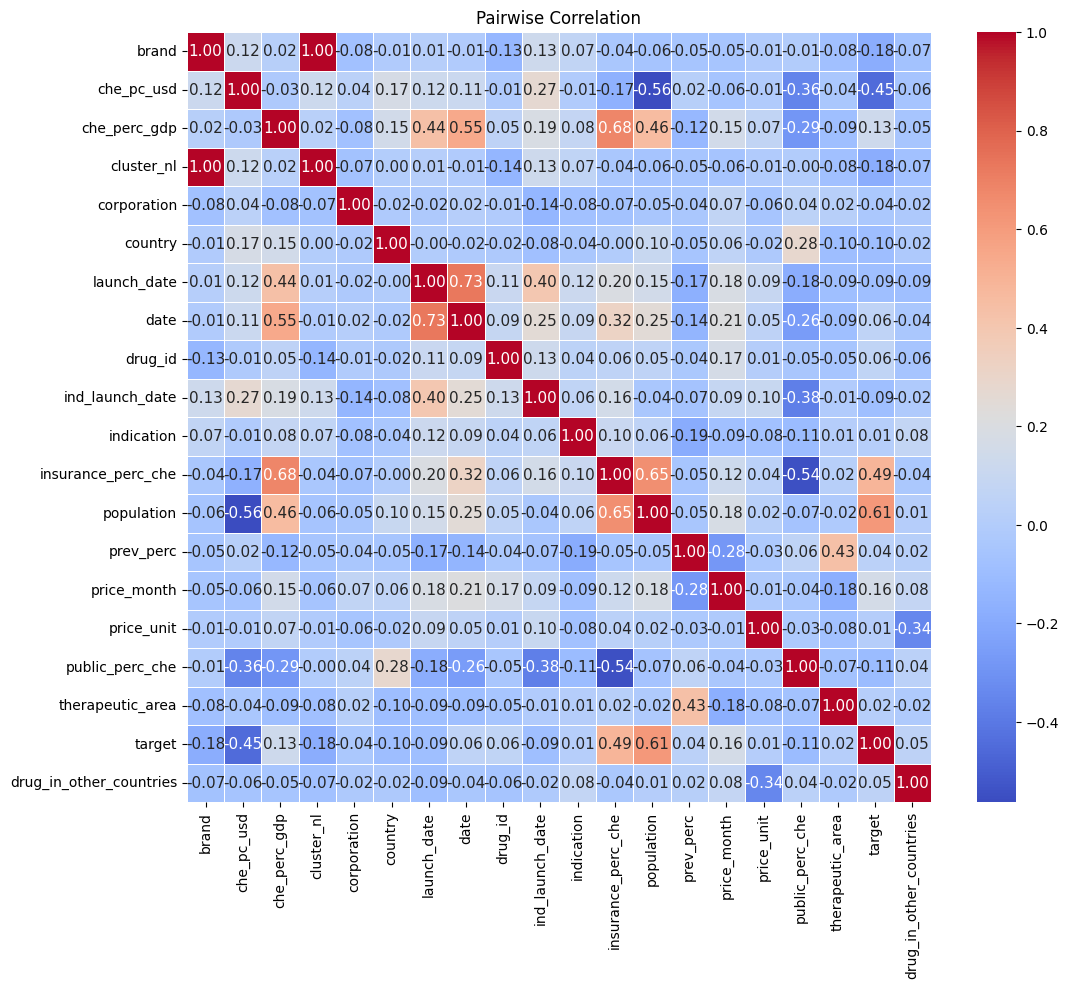


 Pairwise Rangking: 
 target                     1.000000
population                 0.609592
insurance_perc_che         0.487317
che_pc_usd                 0.451797
cluster_nl                 0.183930
brand                      0.179232
price_month                0.158082
che_perc_gdp               0.131773
public_perc_che            0.110824
country                    0.096675
ind_launch_date            0.091970
launch_date                0.090071
drug_id                    0.062204
date                       0.058866
drug_in_other_countries    0.047945
prev_perc                  0.039404
corporation                0.036894
therapeutic_area           0.015472
indication                 0.011409
price_unit                 0.007832
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
1                che_pc_usd    0.405971
12               population    0.108489
7                      date    0.090127
3                cluster_nl   

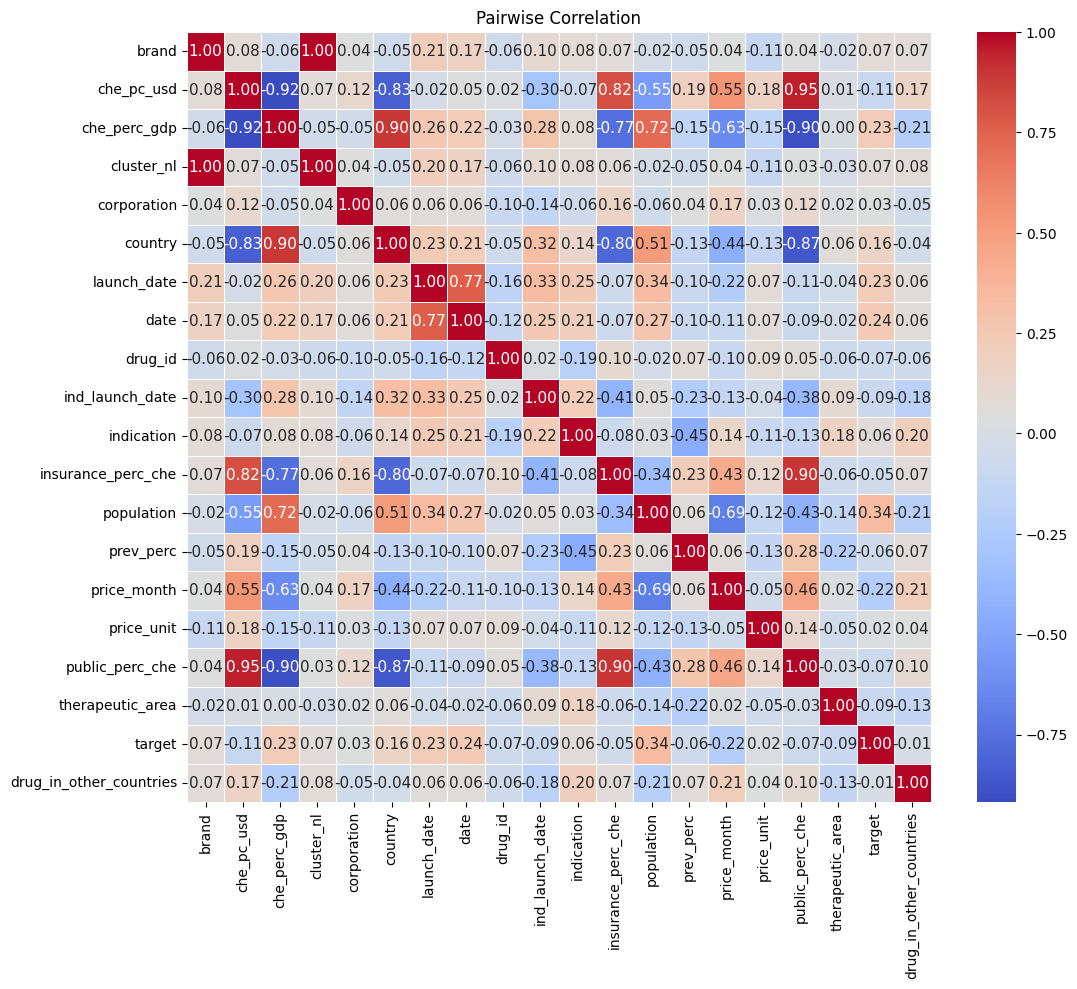


 Pairwise Rangking: 
 target                     1.000000
population                 0.335556
date                       0.237470
che_perc_gdp               0.227876
launch_date                0.226872
price_month                0.219651
country                    0.156839
che_pc_usd                 0.105069
therapeutic_area           0.094958
ind_launch_date            0.091141
brand                      0.074773
public_perc_che            0.072199
cluster_nl                 0.069911
drug_id                    0.068439
indication                 0.064813
prev_perc                  0.058843
insurance_perc_che         0.053487
corporation                0.033896
price_unit                 0.019090
drug_in_other_countries    0.008588
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
0                     brand    0.156922
3                cluster_nl    0.143425
15               price_unit    0.138485
12               population   

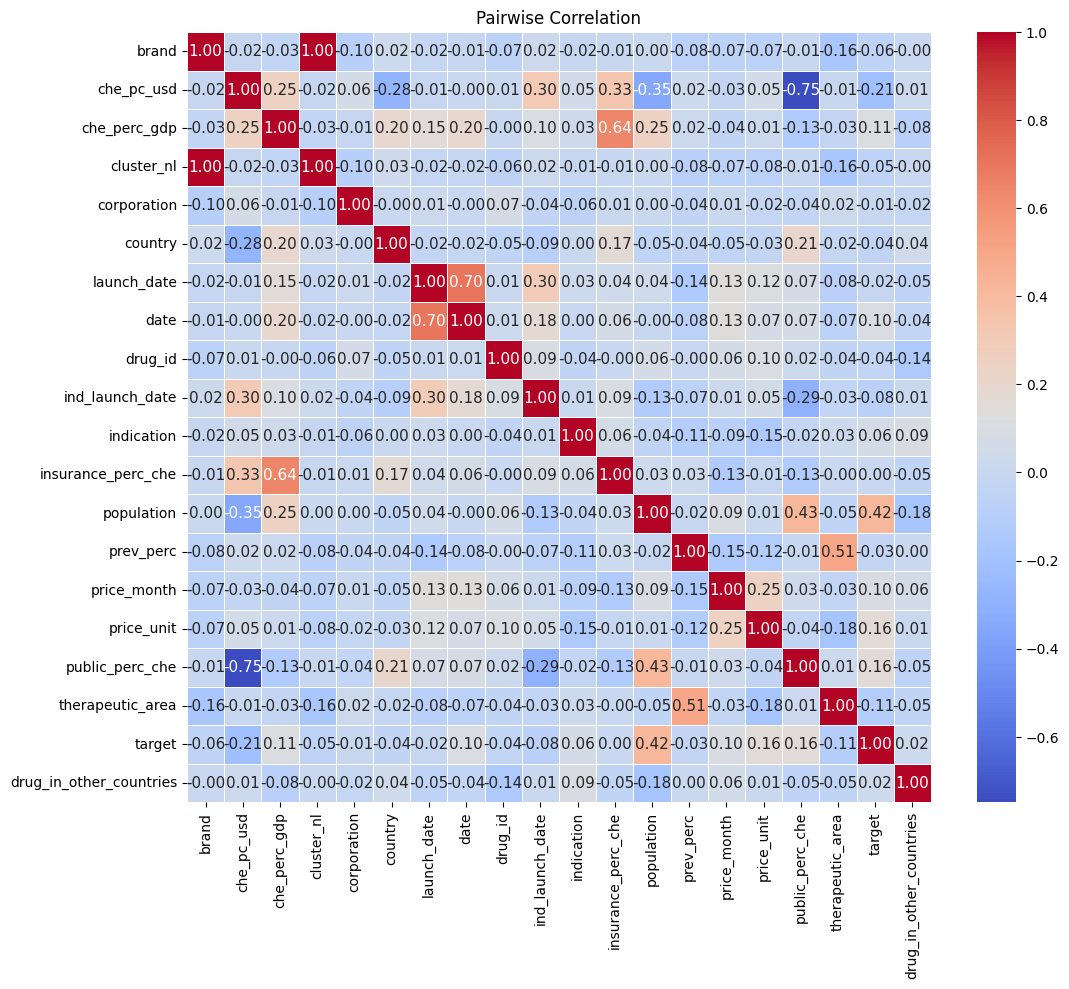


 Pairwise Rangking: 
 target                     1.000000
population                 0.421166
che_pc_usd                 0.210517
price_unit                 0.162501
public_perc_che            0.157948
therapeutic_area           0.111639
che_perc_gdp               0.111134
date                       0.101330
price_month                0.095819
ind_launch_date            0.081036
indication                 0.061550
brand                      0.055603
cluster_nl                 0.053553
country                    0.044251
drug_id                    0.035609
prev_perc                  0.028091
drug_in_other_countries    0.024810
launch_date                0.016500
corporation                0.005921
insurance_perc_che         0.002727
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
12               population    0.229951
15               price_unit    0.135569
13                prev_perc    0.111480
7                      date   

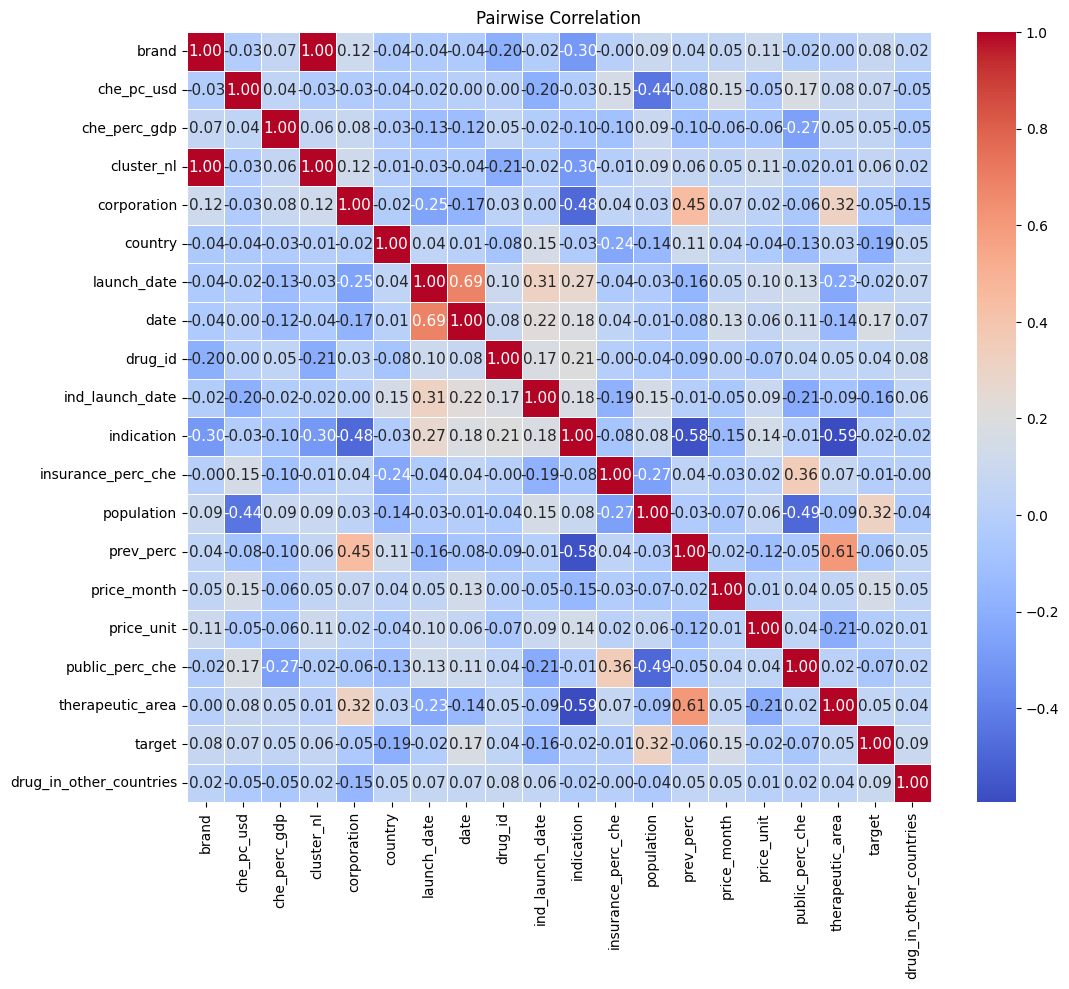


 Pairwise Rangking: 
 target                     1.000000
population                 0.316891
country                    0.191605
date                       0.169317
ind_launch_date            0.158724
price_month                0.148121
drug_in_other_countries    0.091034
brand                      0.077224
che_pc_usd                 0.072999
public_perc_che            0.069916
cluster_nl                 0.063261
prev_perc                  0.057960
therapeutic_area           0.053606
che_perc_gdp               0.050963
corporation                0.050867
drug_id                    0.041098
price_unit                 0.024600
launch_date                0.023707
indication                 0.015176
insurance_perc_che         0.009088
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
12               population    0.196719
7                      date    0.118652
8                   drug_id    0.117270
15               price_unit   

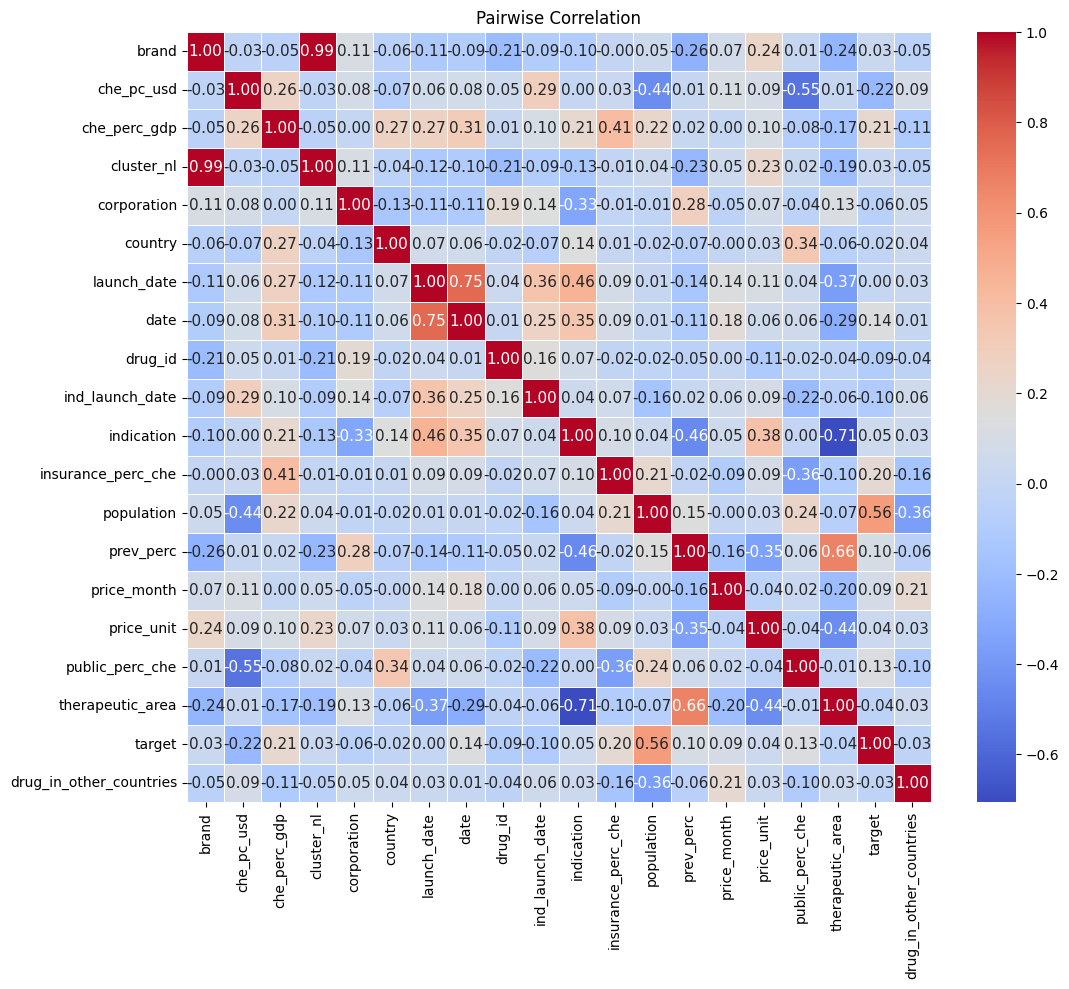


 Pairwise Rangking: 
 target                     1.000000
population                 0.564945
che_pc_usd                 0.219806
che_perc_gdp               0.213379
insurance_perc_che         0.199536
date                       0.138458
public_perc_che            0.133799
prev_perc                  0.101152
ind_launch_date            0.100529
price_month                0.092381
drug_id                    0.090897
corporation                0.063559
indication                 0.049221
therapeutic_area           0.044396
price_unit                 0.038243
brand                      0.030959
drug_in_other_countries    0.030616
cluster_nl                 0.026533
country                    0.016180
launch_date                0.003819
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
12               population    0.343465
15               price_unit    0.111142
7                      date    0.092417
14              price_month   

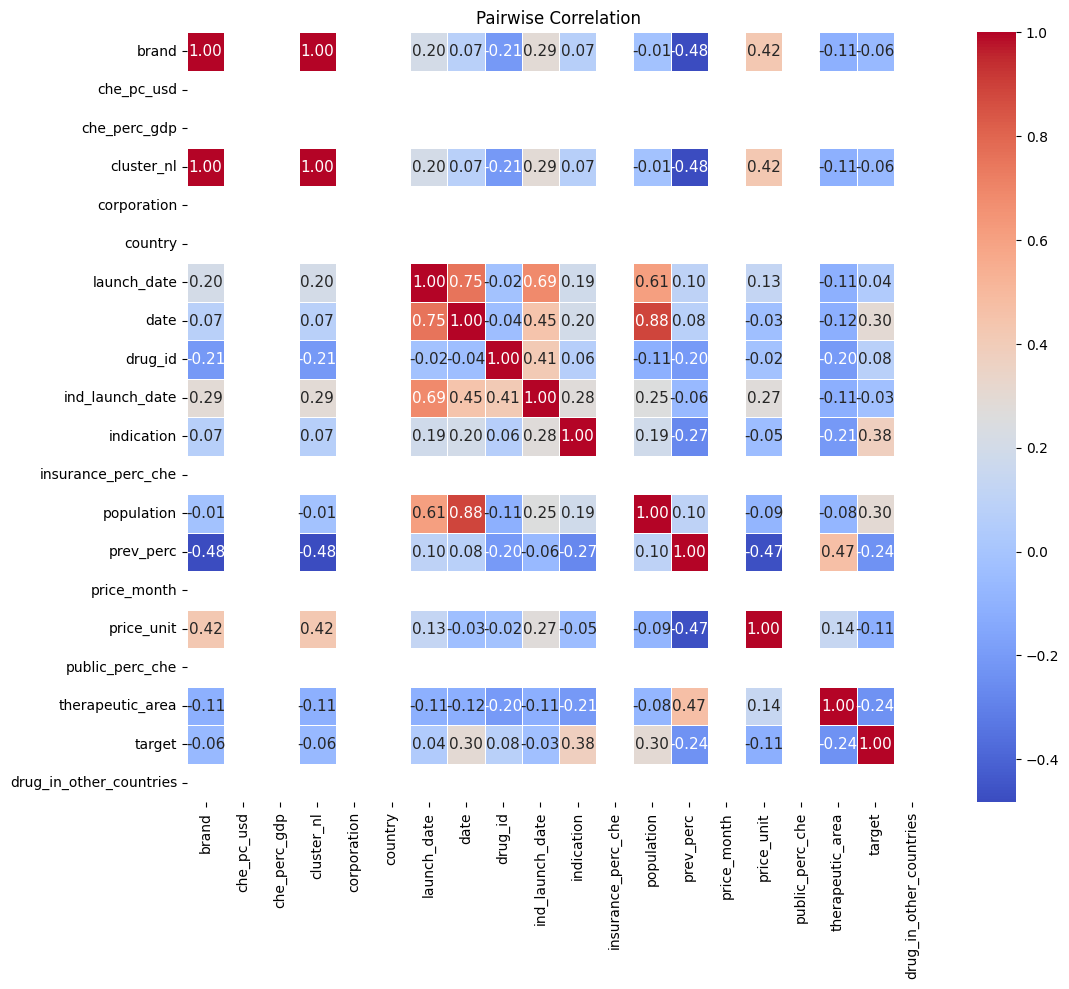


 Pairwise Rangking: 
 target                     1.000000
indication                 0.375757
date                       0.298600
population                 0.295885
therapeutic_area           0.238031
prev_perc                  0.235686
price_unit                 0.114578
drug_id                    0.077595
brand                      0.062112
cluster_nl                 0.062112
launch_date                0.043031
ind_launch_date            0.025638
che_pc_usd                      NaN
che_perc_gdp                    NaN
corporation                     NaN
country                         NaN
insurance_perc_che              NaN
price_month                     NaN
public_perc_che                 NaN
drug_in_other_countries         NaN
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
10               indication    0.409493
7                      date    0.211733
15               price_unit    0.132255
13                prev_perc   

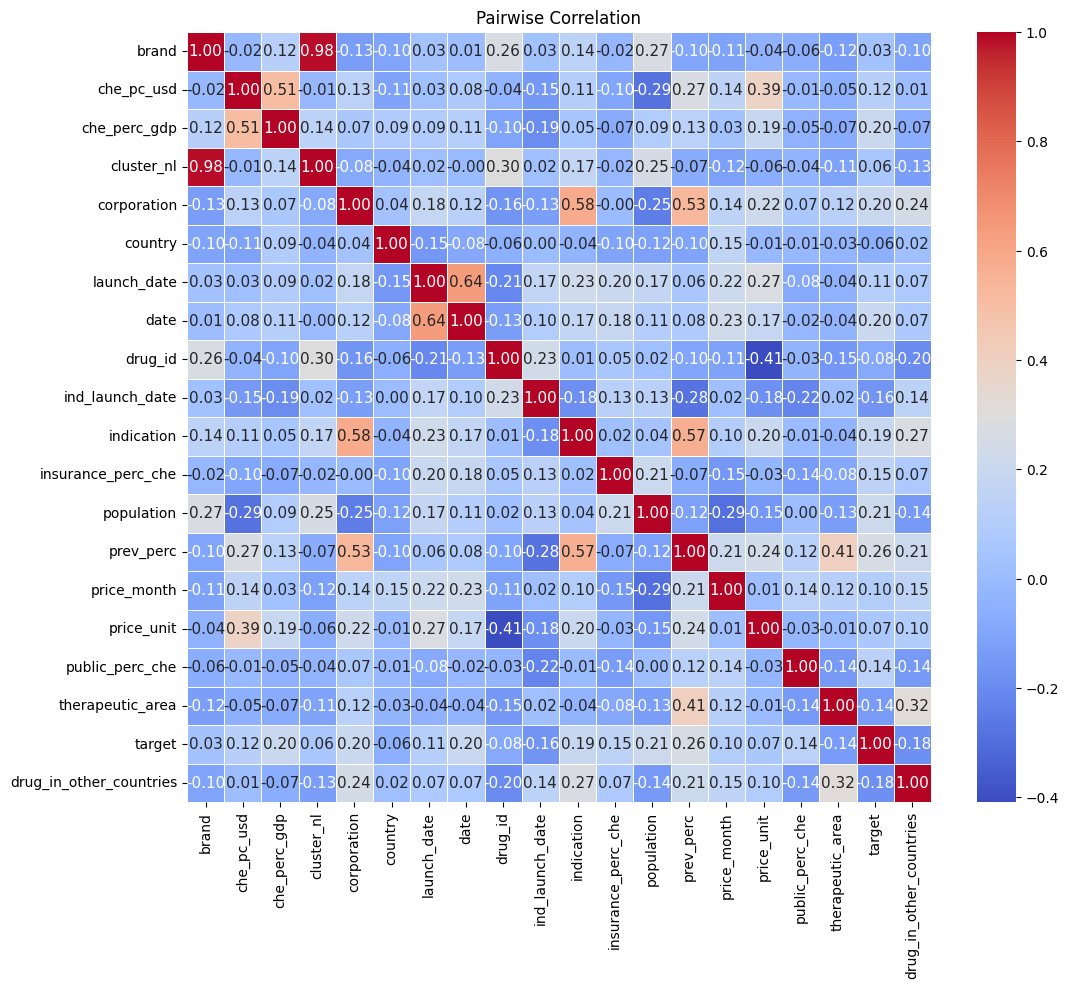


 Pairwise Rangking: 
 target                     1.000000
prev_perc                  0.261252
population                 0.210743
che_perc_gdp               0.198991
corporation                0.197182
date                       0.195684
indication                 0.188219
drug_in_other_countries    0.178371
ind_launch_date            0.164683
insurance_perc_che         0.145596
therapeutic_area           0.137123
public_perc_che            0.135988
che_pc_usd                 0.116266
launch_date                0.110189
price_month                0.102217
drug_id                    0.082263
price_unit                 0.065620
country                    0.061554
cluster_nl                 0.060590
brand                      0.034761
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
8                   drug_id    0.517738
12               population    0.117440
7                      date    0.108938
13                prev_perc   

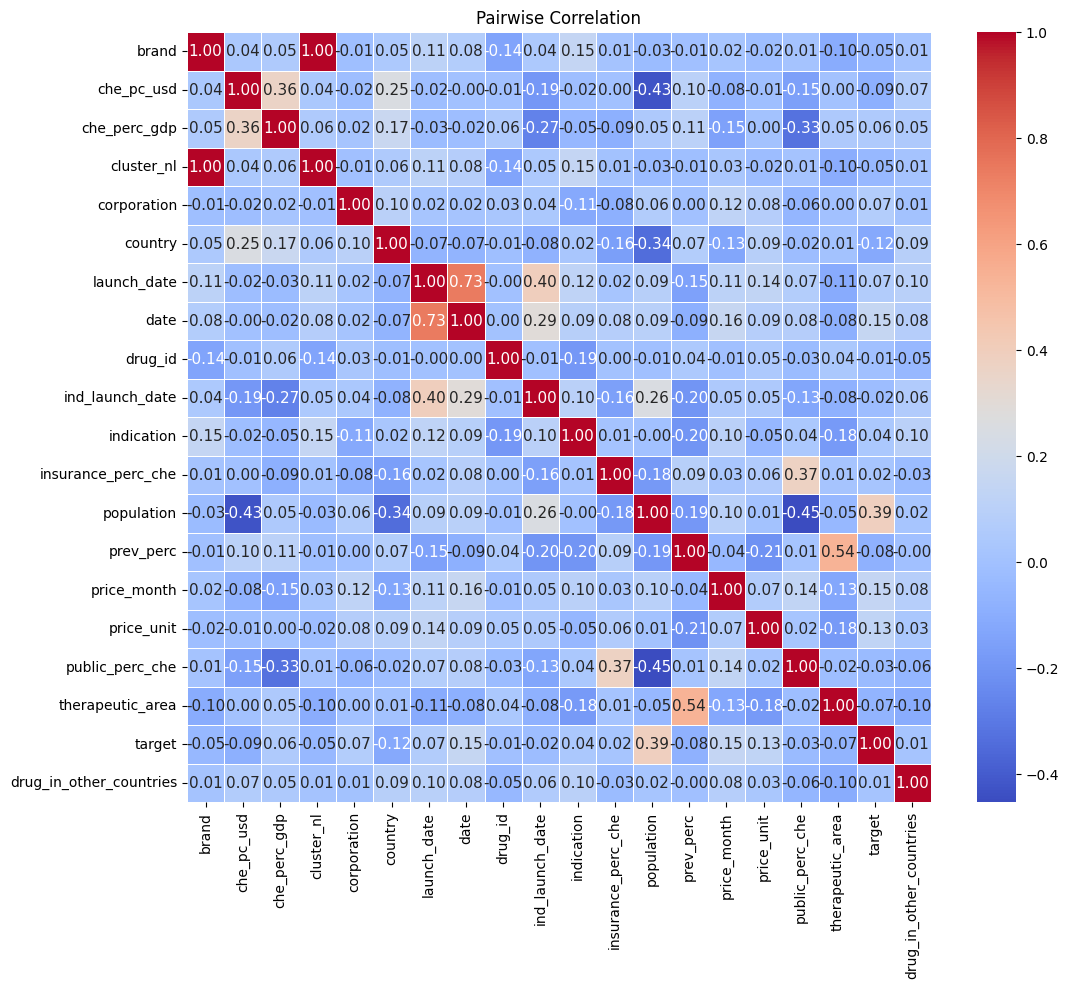


 Pairwise Rangking: 
 target                     1.000000
population                 0.391560
date                       0.151867
price_month                0.146897
price_unit                 0.129037
country                    0.115498
che_pc_usd                 0.087174
prev_perc                  0.081669
corporation                0.072059
launch_date                0.067243
therapeutic_area           0.066701
che_perc_gdp               0.055717
brand                      0.046474
cluster_nl                 0.046049
indication                 0.036435
public_perc_che            0.034803
insurance_perc_che         0.024179
ind_launch_date            0.023889
drug_in_other_countries    0.013765
drug_id                    0.008423
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
12               population    0.405043
13                prev_perc    0.121348
14              price_month    0.093142
7                      date   

In [38]:
n = 8
for i in range(n):
    print(f'--------------------------------------------------------Start_{i}--------------------------------------------------------')
    df = pd.read_csv(
        f'./kmean_{i}.csv',
        low_memory=False
    )
    dff = df
    
    label_encoder = LabelEncoder()
    
    dff['brand'] =  label_encoder.fit_transform(dff['brand'])
    dff['cluster_nl'] =  label_encoder.fit_transform(dff['cluster_nl'])
    dff['corporation'] =  label_encoder.fit_transform(dff['corporation'])
    dff['country'] =  label_encoder.fit_transform(dff['country'])
    dff['launch_date'] =  label_encoder.fit_transform(dff['launch_date'])
    dff['date'] =  label_encoder.fit_transform(dff['date'])
    dff['ind_launch_date'] =  label_encoder.fit_transform(dff['ind_launch_date'])
    dff['indication'] =  label_encoder.fit_transform(dff['indication'])
    dff['drug_id'] =  label_encoder.fit_transform(dff['drug_id'])
    dff['therapeutic_area'] =  label_encoder.fit_transform(dff['therapeutic_area'])
    dff = dff.drop('therapeutic_area_encoded', axis=1)
    dff = dff.drop('cluster_nl_encoded', axis=1)
    
    columns = ['che_pc_usd', 'che_perc_gdp', 'insurance_perc_che', 
               'population', 'prev_perc', 'price_month', 
               'price_unit', 'target']
    
    # Show the statistics for the selected columns
    statistics = dff[columns].describe()
    
    print('statistics\n ',statistics)
    
    pairwise_corr = dff.corr()
    
    # Create the heatmap with larger figure size and adjusted annotations
    plt.figure(figsize=(12, 10))  # Increase the figure size
    sns.heatmap(pairwise_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, annot_kws={'size': 11})
    
    plt.title("Pairwise Correlation")
    plt.show()
    
    target_corr = pairwise_corr['target'].apply(abs).sort_values(ascending=False)
    print('\n Pairwise Rangking: \n',target_corr)
    
    # With RandomForest
    X = dff.drop(columns=['target'])  # Exclude the 'target' column from X
    y = dff['target']  # Target is the 'target' column
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    feature_importances = rf.feature_importances_
    
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })
    
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    print('\nImportant Feature By RandomForest: \n',feature_importance_df)
    print(f'--------------------------------------------------------End_{i}--------------------------------------------------------\n\n')

# Began Modeling

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import math

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_error_metrics(actual, forecasted):
    mae = np.mean(np.abs(actual - forecasted))
    mape = np.mean(np.abs((actual - forecasted) / actual)) * 100
    mse = np.mean((actual - forecasted) ** 2)
    rmse = np.sqrt(mse)
    return mae, mape, mse, rmse

In [155]:
base_feature = ['population', 'price_unit', 'price_month', 'date','target']
feature_model = {
	0: base_feature + ['che_pc_usd', 'insurance_perc_che'],
	1: base_feature + ['che_perc_gdp'],
	2: base_feature + [],
	3: base_feature + [],
	4: base_feature + ['che_pc_usd', 'che_perc_gdp'],
	5: base_feature + ['indication'],
	6: base_feature + ['prev_perc'],
	7: base_feature +[]
}
cluster_model = {}

In [164]:
for cluster in range(7):
    print(f'--------------------------------------------------------Start_{cluster}--------------------------------------------------------\n\n')
    # Read data
    data = pd.read_csv(
        f'./kmean_{cluster}.csv',
        low_memory=False
    )
    
    data_for_model = data[feature_model[cluster]]
    data_for_model['date'] = pd.to_datetime(data_for_model['date'])
    data_for_model = data_for_model.sort_values('date')
    data_for_model.to_csv(f'dataformodel.csv', index=False)
    data_for_model.set_index('date', inplace=True)
    
    train_size = math.ceil(len(data_for_model) * 0.70)
    pivot = train_size
    
    best_mape = np.inf
    best_order = None
    best_model = None
    target = 'target'
    
    missing_values = data_for_model[target].isna().sum()
    print(f'Missing values in the target column: {missing_values}')
    
    for i in range(0,10):
        for j in range(0,10):
            for k in range(0,10):
                try:
                    model = ARIMA(data_for_model[target], order=(i, j, k))
                    results = model.fit()
                    y_pred = results.forecast(steps=len(data_for_model))
                    y_true_test = data_for_model[target][pivot+1:]
                    y_pred_test = y_pred[pivot+1:]
                    _, mape, _, _ = calculate_error_metrics(y_true_test.values, y_pred_test.values)
                    if mape < best_mape:
                        best_mape = mape
                        best_model = results
                        best_order = (i, j, k)
                except Exception as e:
                    print(f"ARIMA({i}, {j}, {k}) - Exception: {e}")
                    continue
                    
    if best_model is not None:
        y_true = best_model.forecast(steps=len(data_for_model))
        y_pred = best_model.forecast(steps=len(data_for_model))
        
        y_true_train = data_for_model[target][0:pivot]
        y_pred_train = y_true[0:pivot]
    
        y_true_test = data_for_model[target][pivot+1:]
        y_pred_test = y_pred[pivot+1:]
    
        mae_test, mape_test, mse_test, rmse_test = calculate_error_metrics(y_true_test.values, y_pred_test.values)
    
        # Forecast the next three months
        forecast_steps = 3
        y_forecast = best_model.forecast(steps=forecast_steps)
        forecast_index = pd.date_range(start=data_for_model.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
    
        print(f"Test Set Metrics:")
        print(f"  MAE: {mae_test}")
        print(f"  MAPE: {mape_test:.2f}%")
        print(f"  MSE: {mse_test}")
        print(f"  RMSE: {rmse_test}")
        cluster_model[cluster] = best_model
    else:
        print(f"No suitable model found for the cluster {cluster}.")
    print(f'--------------------------------------------------------End_{cluster}--------------------------------------------------------\n\n')

--------------------------------------------------------Start_0--------------------------------------------------------


Missing values in the target column: 0


/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_21956/383930029.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model['date'] = pd.to_datetime(data_for_model['date'])
/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dat

/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date ind

/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date ind

KeyboardInterrupt: 